In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jety2021329206","key":"7da1c41ea1dd27e698e2a83cd7eefb73"}'}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/



In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          18864        581  1.0              
aemyjutt/diabetesdataanslysis                              DiabetesDataAnslysis                              9KB  2023-09-23 13:48:24            955         25  1.0              
joebeachcapital/students-performance                       Students Performance                              2KB  2023-08-31 00:50:11           6777        163  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target   

In [ ]:
! kaggle competitions download -c 'aptos2019-blindness-detection'

100% 9.50G/9.51G [01:16<00:00, 139MB/s]
100% 9.51G/9.51G [01:16<00:00, 134MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip aptos2019-blindness-detection


Streaming output truncated to the last 5000 lines.
  inflating: test_images/512beaada8f0.png  
  inflating: test_images/51323e9d2070.png  
  inflating: test_images/515675001b9e.png  
  inflating: test_images/515877da2def.png  
  inflating: test_images/5168ddccea88.png  
  inflating: test_images/5172c056a687.png  
  inflating: test_images/5177461f5339.png  
  inflating: test_images/51910bcb980d.png  
  inflating: test_images/51a3e9b6a1c0.png  
  inflating: test_images/51bbd82feec8.png  
  inflating: test_images/51de5fb8eccd.png  
  inflating: test_images/51e88694c81f.png  
  inflating: test_images/51f0bf8f1544.png  
  inflating: test_images/51f57fb32840.png  
  inflating: test_images/51fa42dc1415.png  
  inflating: test_images/5276ab33b7b0.png  
  inflating: test_images/52a353760f72.png  
  inflating: test_images/531937254e73.png  
  inflating: test_images/5325b1c22c61.png  
  inflating: test_images/53959e0a750b.png  
  inflating: test_images/53be22c72713.png  
  inflating: test_images/

In [34]:
from numpy.random import seed
seed(2)
import random
import numpy as np
import tensorflow as tf
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

2.13.0


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator




In [36]:
import os
blnd_img=list()
for file in os.listdir("/content/drive/MyDrive/dataset/aptos2019-blindness-detection/train_images"):
    #if file.endswith(".jpg"):
      #print(1)

        #print(os.path.join('/content/jpg', file))
        img=blnd_img.append(os.path.join("/content/drive/MyDrive/dataset/aptos2019-blindness-detection/train_images",file))
        #print(blnd_img)

In [37]:
blnd_df = pd.DataFrame(blnd_img)
blnd_df['colFromIndex'] = blnd_df.index
blnd_df = blnd_df.sort_values([0, 'colFromIndex'])
blnd_df=blnd_df.reset_index()
len(blnd_df)


3663

In [38]:
label_dataframe = pd.read_csv('/content/drive/MyDrive/dataset/aptos2019-blindness-detection/train.csv')
label_dataframe


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [39]:
label_dataframe['colFromIndex'] = label_dataframe.index
label_dataframe= label_dataframe.sort_values(['id_code','colFromIndex'])
label_dataframe=label_dataframe.reset_index()
#blnd_df
label_dataframe.head()

,index,id_code,diagnosis,colFromIndex
0,0,000c1434d8d7,2,0
1,1,001639a390f0,4,1
2,2,0024cdab0c1e,1,2
3,3,002c21358ce6,0,3
4,4,005b95c28852,0,4


In [ ]:
#from keras.preprocessing.image import img_to_array
i=0
import cv2
import numpy as np
while i<len(blnd_df[0]):
  a=cv2.imread(blnd_df[0][i])
  a=cv2.resize(a,(32,32))
  #a=img_to_array(a)
  #a=np.expand_dims(a,axis=0)
  #a=a[np.newaxis,:,:]
  #a = a.reshape((1,) + a.shape)
  blnd_df[0][i]=a
  print(i)
  i+=1

<ipython-input-40-4d0e3d594e28>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blnd_df[0][i]=a


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

error: ignored

In [9]:
blnd_df[1]=label_dataframe['id_code']
blnd_df[2]=label_dataframe['diagnosis']
print(blnd_df.head(5))
print(blnd_df.tail(5))

   index                                                  0  colFromIndex  \
0   1000  [[[0, 0, 0], [0, 0, 0], [93, 255, 255], [82, 2...          1000   
1   1009  [[[0, 0, 0], [0, 0, 0], [14, 59, 88], [16, 62,...          1009   
2   1001  [[[0, 0, 0], [0, 0, 0], [30, 96, 127], [22, 86...          1001   
3   1002  [[[0, 0, 0], [0, 0, 0], [37, 107, 174], [45, 1...          1002   
4   1006  [[[0, 0, 0], [0, 0, 0], [23, 69, 116], [24, 63...          1006   

              1  2  
0  000c1434d8d7  2  
1  001639a390f0  4  
2  0024cdab0c1e  1  
3  002c21358ce6  0  
4  005b95c28852  0  
      index                                                  0  colFromIndex  \
1923    997  [[[0, 0, 0], [0, 0, 0], [41, 61, 94], [37, 62,...           997   
1924    998  [[[6, 4, 4], [6, 4, 4], [5, 4, 4], [6, 5, 6], ...           998   
1925    999  [[[0, 0, 0], [0, 0, 0], [5, 86, 136], [13, 82,...           999   
1926    996  [[[2, 1, 3], [1, 1, 1], [2, 1, 3], [2, 1, 3], ...           996   
1927    995

In [10]:
from sklearn.model_selection import train_test_split
train_img_blnd, test_img_blnd, train_label_blnd, test_label_blnd = train_test_split(blnd_df[0], blnd_df[2], test_size=0.2)

In [12]:
train=np.save('/content/drive/MyDrive/dataset/aptos2019-blindness-detection/train', np.stack(train_img_blnd,axis=0))
test=np.save('/content/drive/MyDrive/dataset/aptos2019-blindness-detection/test', np.stack(test_img_blnd,axis=0))

In [13]:
train_img_blnd=np.load('/content/drive/MyDrive/dataset/aptos2019-blindness-detection/train.npy')
test_img_blnd = np.load('/content/drive/MyDrive/dataset/aptos2019-blindness-detection/test.npy')
train_img_blnd.shape


(1542, 32, 32, 3)

In [14]:
train_img_blnd=train_img_blnd.astype('float32')/255
test_img_blnd=test_img_blnd.astype('float32')/255

In [15]:
train_label_blnd=train_label_blnd.astype('category')
dummies_train= pd.get_dummies(train_label_blnd)
dummies_train.head()

,0,1,2,3,4
575,1,0,0,0,0
1354,1,0,0,0,0
825,0,0,1,0,0
1230,0,0,1,0,0
1636,0,1,0,0,0


In [16]:
test_label_blnd=test_label_blnd.astype('category')
dummies_test= pd.get_dummies(test_label_blnd)
dummies_test.head()

,0,1,2,3,4
1379,1,0,0,0,0
1755,1,0,0,0,0
1237,0,0,0,0,1
1079,1,0,0,0,0
476,0,1,0,0,0


In [17]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_img_blnd.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(700))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 30
    model.add(Dense(5))
    model.add(Activation('softmax'))

In [18]:
import tensorflow as tf
# Create an instance of the Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Use the optimizer in your model.compile() or model.fit() calls
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
history = model.fit(train_img_blnd, dummies_train, batch_size=128, validation_data = (test_img_blnd, dummies_test), epochs=15)


Epoch 1/15
13/13 [==============================] - 8s 550ms/step - loss: 1.1092 - accuracy: 0.5415 - val_loss: 1.3815 - val_accuracy: 0.4223
Epoch 2/15
13/13 [==============================] - 7s 504ms/step - loss: 1.1056 - accuracy: 0.5486 - val_loss: 1.3827 - val_accuracy: 0.4404
Epoch 3/15
13/13 [==============================] - 8s 620ms/step - loss: 1.0915 - accuracy: 0.5603 - val_loss: 1.3860 - val_accuracy: 0.4249
Epoch 4/15
13/13 [==============================] - 6s 481ms/step - loss: 1.0745 - accuracy: 0.5590 - val_loss: 1.4084 - val_accuracy: 0.4352
Epoch 5/15
13/13 [==============================] - 8s 601ms/step - loss: 1.0752 - accuracy: 0.5649 - val_loss: 1.4484 - val_accuracy: 0.4326
Epoch 6/15
13/13 [==============================] - 7s 501ms/step - loss: 1.0858 - accuracy: 0.5525 - val_loss: 1.4636 - val_accuracy: 0.4197
Epoch 7/15
13/13 [==============================] - 11s 869ms/step - loss: 1.0167 - accuracy: 0.5765 - val_loss: 1.4584 - val_accuracy: 0.4301
Epoch


KeyboardInterrupt



In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

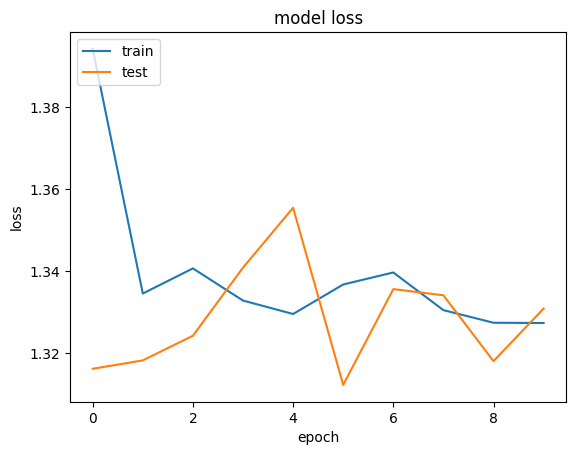

In [21]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
print(max(history.history["accuracy"]))
print(max(history.history["val_accuracy"]))

0.4760051965713501
0.46891191601753235


In [23]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_img_blnd.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32,(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(900))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 10
    model.add(Dense(5))
    model.add(Activation('softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Use the optimizer in your model.compile() or model.fit() calls
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
b_history = model.fit(train_img_blnd, dummies_train, batch_size=128, validation_data = (test_img_blnd, dummies_test), epochs=15)

Epoch 1/15
13/13 [==============================] - 11s 629ms/step - loss: 2.0613 - accuracy: 0.3320 - val_loss: 1.5019 - val_accuracy: 0.3031
Epoch 2/15
13/13 [==============================] - 7s 498ms/step - loss: 1.7999 - accuracy: 0.3911 - val_loss: 1.4583 - val_accuracy: 0.2979
Epoch 3/15
13/13 [==============================] - 8s 599ms/step - loss: 1.7080 - accuracy: 0.3859 - val_loss: 1.4102 - val_accuracy: 0.2979
Epoch 4/15
13/13 [==============================] - 7s 528ms/step - loss: 1.6066 - accuracy: 0.4241 - val_loss: 1.4329 - val_accuracy: 0.2979
Epoch 5/15
13/13 [==============================] - 8s 602ms/step - loss: 1.5485 - accuracy: 0.4176 - val_loss: 1.3861 - val_accuracy: 0.2979
Epoch 6/15
13/13 [==============================] - 7s 530ms/step - loss: 1.5669 - accuracy: 0.4170 - val_loss: 1.3321 - val_accuracy: 0.3549
Epoch 7/15
13/13 [==============================] - 9s 689ms/step - loss: 1.5123 - accuracy: 0.4384 - val_loss: 1.3171 - val_accuracy: 0.4275
Epoch

In [ ]:
print(max(b_history.history["accuracy"]))
print(max(b_history.history["val_accuracy"]))

0.7801297307014465
0.2619372308254242


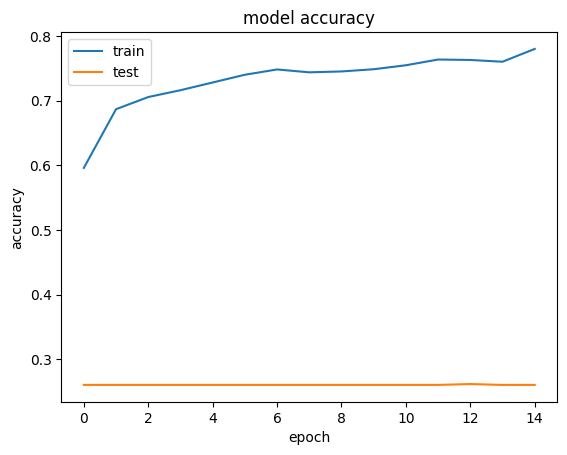

In [ ]:
plt.plot(b_history.history["accuracy"])
plt.plot(b_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

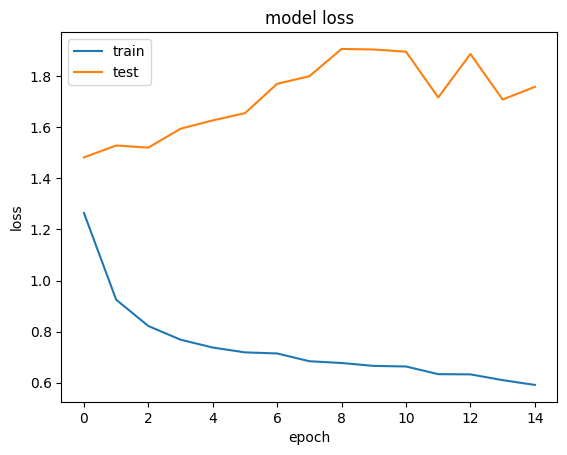

In [ ]:
plt.plot(b_history.history["loss"])
plt.plot(b_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()